In [1]:
import mnist

In [2]:
train_img=mnist.train_images()[0:1000]

In [3]:
print(train_img)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [4]:
train_lbl=mnist.train_labels()[0:1000]

In [5]:
test_img=mnist.test_images()[0:1000]

In [6]:
test_lbl=mnist.test_labels()[0:1000]

In [7]:
import matplotlib.pyplot as plt

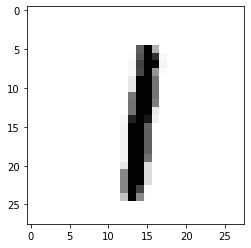

In [8]:
plt.imshow(train_img[40],plt.get_cmap("Greys"))#,cmap=("Greys")

In [9]:
train_lbl[40]

1

In [10]:
train_img[40].shape

(28, 28)

In [11]:
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D,Flatten

In [12]:
model=Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation="relu"))#convolution layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))#pooling layer
model.add(layers.Conv2D(64,(2,2),activation="relu"))#convolution layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))#pooling layer
model.add(layers.Flatten())#fully connected layer
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
train_lbl.dtype

dtype('uint8')

In [14]:
import tensorflow as tf
train_lbl=tf.keras.utils.to_categorical(train_lbl)
test_lbl=tf.keras.utils.to_categorical(test_lbl)

In [15]:
train_lbl.dtype

dtype('float32')

In [16]:
train_img.dtype

dtype('uint8')

In [17]:
train_img.shape

(1000, 28, 28)

In [18]:
train_img=train_img.reshape((1000,28,28,1))

In [19]:
train_img.shape

(1000, 28, 28, 1)

In [20]:
train_img=train_img.astype("float32")/255
test_img=test_img.astype("float32")/255

In [21]:
train_img.shape

(1000, 28, 28, 1)

In [22]:
model.fit(train_img,train_lbl,epochs=10)

Epoch 1/10
32/32 [==============================] - 5s 28ms/step - loss: 1.8105 - accuracy: 0.4570
Epoch 2/10
32/32 [==============================] - 1s 25ms/step - loss: 0.6664 - accuracy: 0.7990
Epoch 3/10
32/32 [==============================] - 1s 24ms/step - loss: 0.4186 - accuracy: 0.8780
Epoch 4/10
32/32 [==============================] - 1s 24ms/step - loss: 0.3121 - accuracy: 0.9070
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 0.2310 - accuracy: 0.9360
Epoch 6/10
32/32 [==============================] - 1s 24ms/step - loss: 0.1857 - accuracy: 0.9530
Epoch 7/10
32/32 [==============================] - 1s 25ms/step - loss: 0.1452 - accuracy: 0.9600
Epoch 8/10
32/32 [==============================] - 1s 25ms/step - loss: 0.1161 - accuracy: 0.9660
Epoch 9/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0758 - accuracy: 0.9800
Epoch 10/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0579 - accuracy: 0.9860


In [24]:
model.evaluate(test_img,test_lbl)

32/32 [==============================] - 1s 9ms/step - loss: 0.2459 - accuracy: 0.9220


[0.24587641656398773, 0.921999990940094]